# Problem statement

## Business Context

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated smart tv platforms.

Presently, OTT services are at a relatively nascent stageand are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at \\$121.61 billion in 2019 and is projected to reach \\$1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity. 

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46\% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.



## Objective

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

## Data Description

The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

* visitors: Average number of visitors, in millions, to the platform in the past week
* ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
* major_sports_event: Any major sports event on the day
* genre: Genre of the content
* dayofweek: Day of the release of the content
* season: Season of the release of the content
* views_trailer: Number of views, in millions, of the content trailer
* views_content: Number of first-day views, in millions, of the content


## Importing necessary libraries

In [3]:
# libraries to help with reading and manupulating the data 
import numpy as np
import pandas as pd

# import the libraries to help data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using stats models
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to supress varnings
import warnings
warnings.filterwarnings("ignore")

### Load the data

In [4]:
data = pd.read_csv("C:\\Users\\Dell\\Downloads\\ottdata.csv")

## Data overview

### Displaying the first few rows in the dataset

In [5]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


### Checking the shape of the dataset

In [6]:
data.shape

(1000, 8)

* The given data set contains 1000 rows and 8 columns.

### Checking the data types of the columns of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


* There is no null values in the given dataset.

### Checking for unique values

In [8]:
unique_counts = data.nunique()
unique_counts

visitors               56
ad_impressions         80
major_sports_event      2
genre                   8
dayofweek               7
season                  4
views_trailer         799
views_content          61
dtype: int64

### Checking for duplicate values

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

* There is no duplicate values in the given data.

### Checking for missing values

#### Before we start exploring the data further, let's quickly check the missing value in the data.

In [10]:
data.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

* There is no missing values in the given data.

### Statistical summery of the given data

In [11]:
data.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


* The average number of visitors is around 1.7 million, with a fairly narrow spread given the small standard deviation (0.232). The interquartile range(IQR) is from 1.55 to 1.83 million.
* There is a wider spread in the number of ad impressions, with a mean of approximately 1434.712 million and a standard deviation of about289.535 million. The IQR ranges from 1210.330 to 1623.670 million.
* The binary nature of this variable shows that 40% of the records had a major sports event, with a relatively high standard deviation due to it's binary nature.
* The average number of trailer views is around 66.916 million, with a notable spread as indicated by the standard deviation (35.001). 
* The first day views of content average at 0.473 million, with a narrow spread (standard deviation of 0.106).

## Exploratory Data Analysis

### Univariate Analysis

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid =2
        sharex=True,  # x-axis will be shared among all subplots 
        gridspec_kw={"height_ratios": (0.25, 0.75)}, 
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram 
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage to the top
    
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is false)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    
    total = len(data[feature]) #  length of the column 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
            
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        

    plt.show()  # show the plot

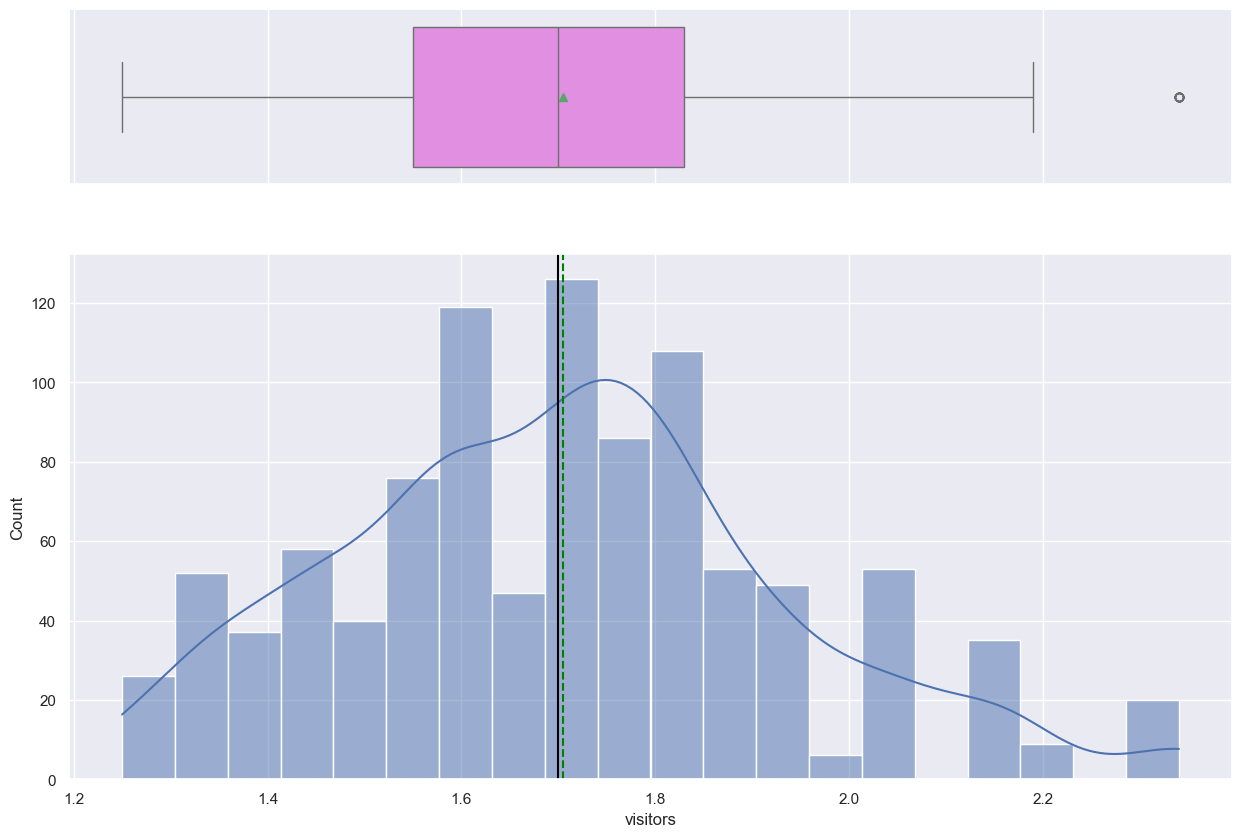

In [14]:
histogram_boxplot(data, "visitors", kde=True)

* The average number of everyday visitors to the online platform is vary, it may be depending on the there free time.
* The average number of visitors are 17 Million people. 

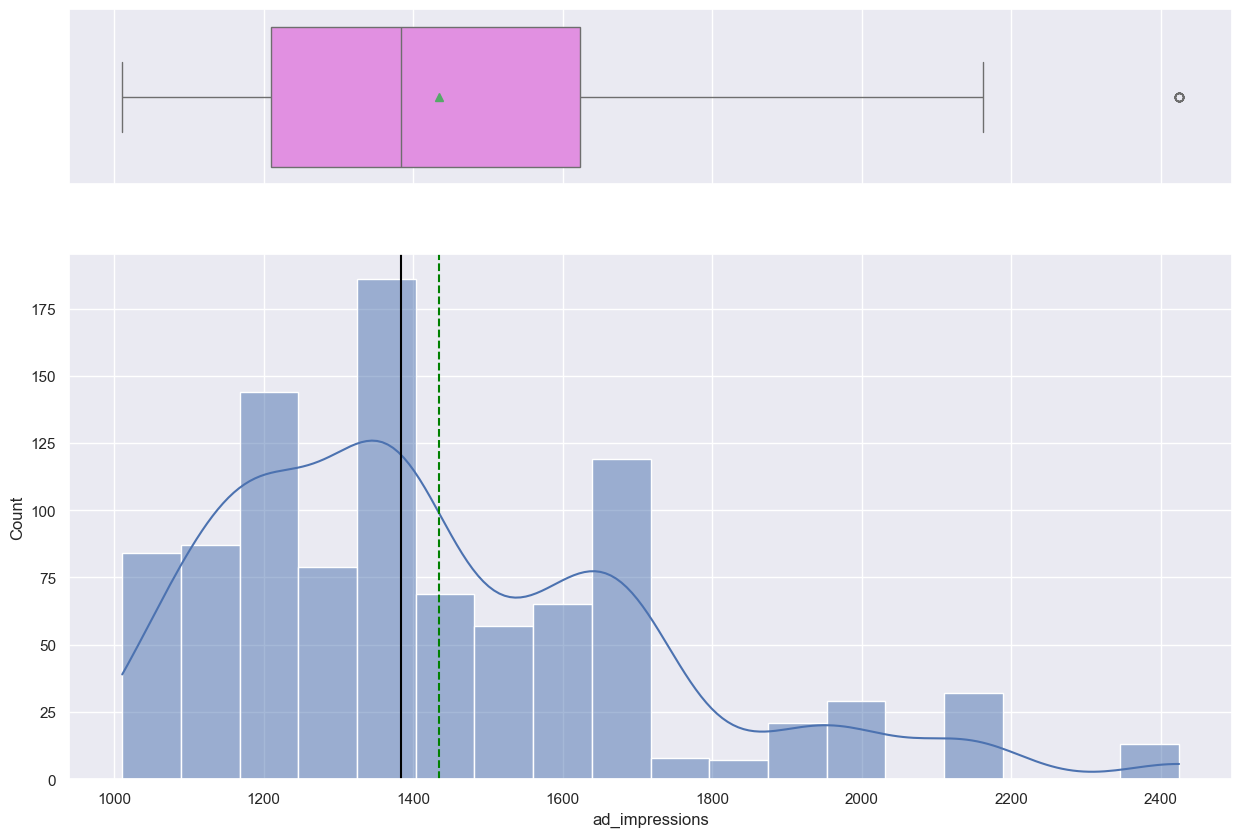

In [15]:
histogram_boxplot(data, "ad_impressions", kde=True)

* Ad-impression is Changed each week, this week may be low compared to last week like that. 
* The destribution is not normal.

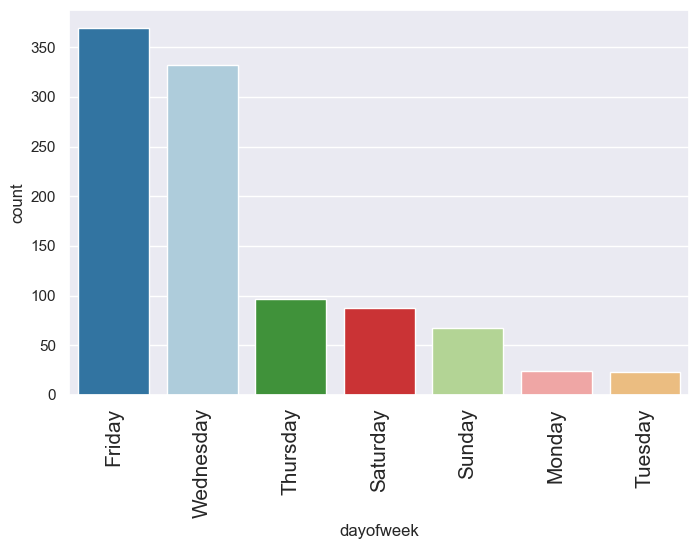

In [16]:
labeled_barplot(data, "dayofweek", perc=True)

* Compare to other days of the week, in Friday and Wednesday shows are relesed highly. Same way very low shows are relesed in Monday and Tuesday.

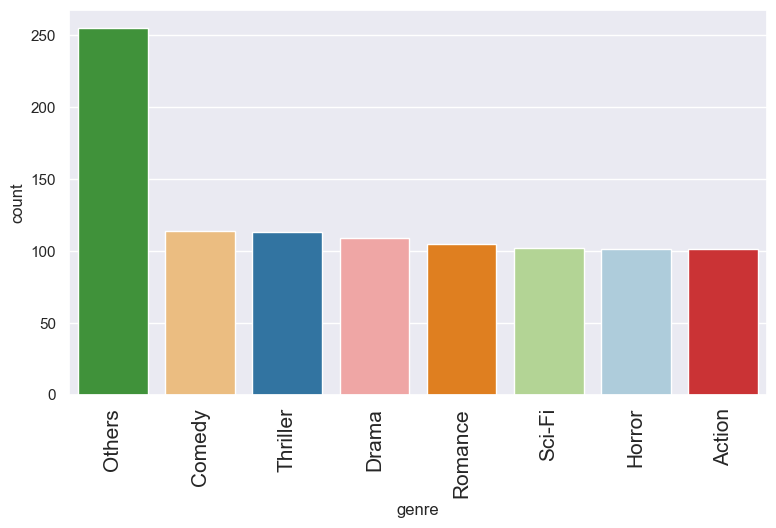

In [17]:
labeled_barplot(data, "genre", perc=True)

* There is no much difference in genre, all types of genres relesed equally, but the release of other genre shows compared to over 7 genres are very high. May be other genre contain sports and etc.

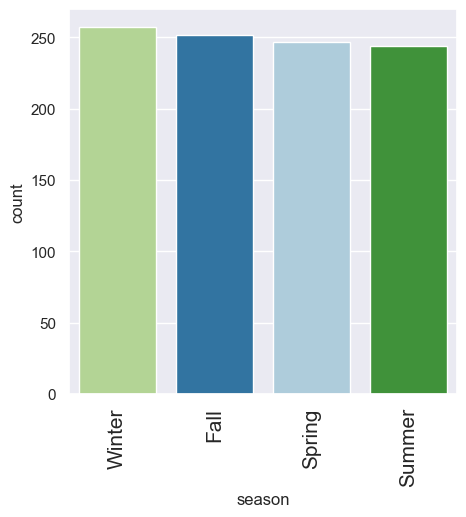

In [18]:
labeled_barplot(data, "season", perc=True)

* There is no much difference in seasons, i think the shows are not releses depends on season.

### Bivariate Analysis

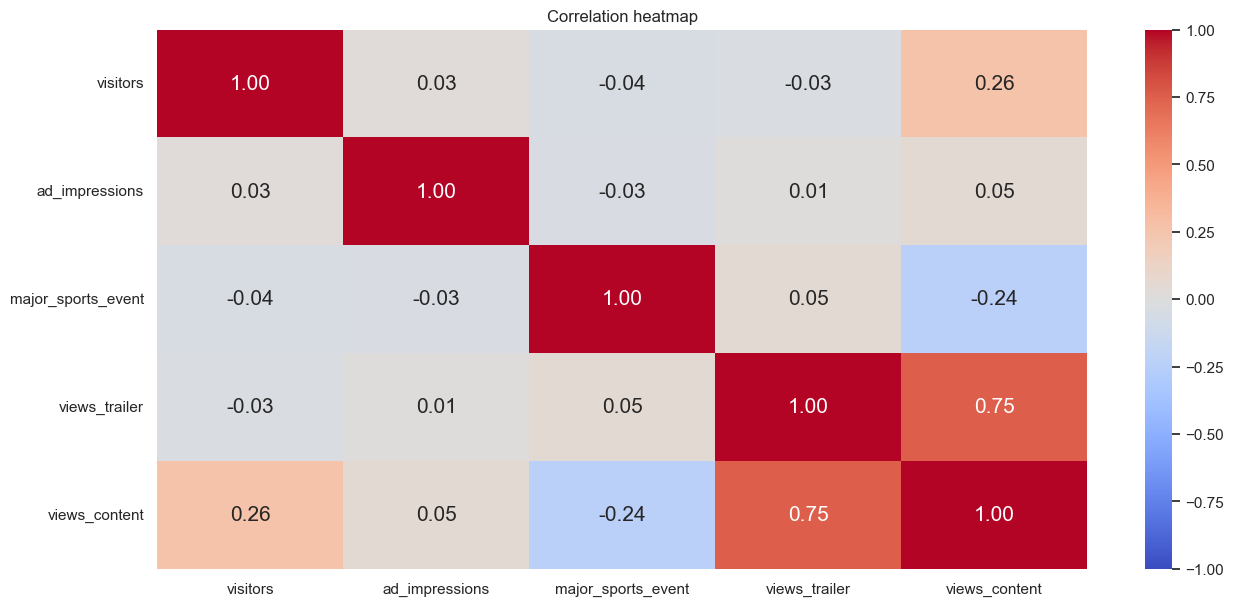

In [19]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})
plt.title("Correlation heatmap")
plt.show()

* The correlation between trailer view and content view is approximately 0.75. This suggest a positive correlation.
* As the number of trailer views increases, the number of content views tend to increase as well.


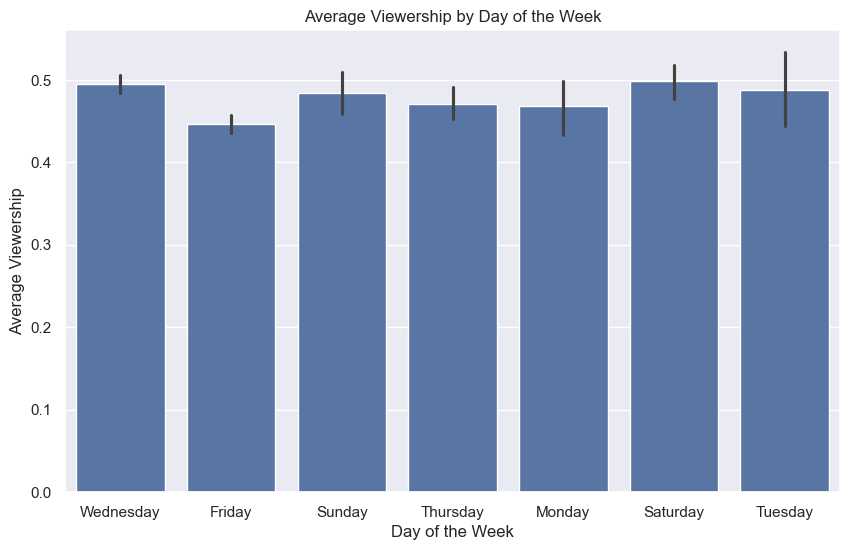

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data, x='dayofweek', y='views_content')
plt.title('Average Viewership by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Viewership')
plt.show()


* viewership is slightly vary with the day of the week. 

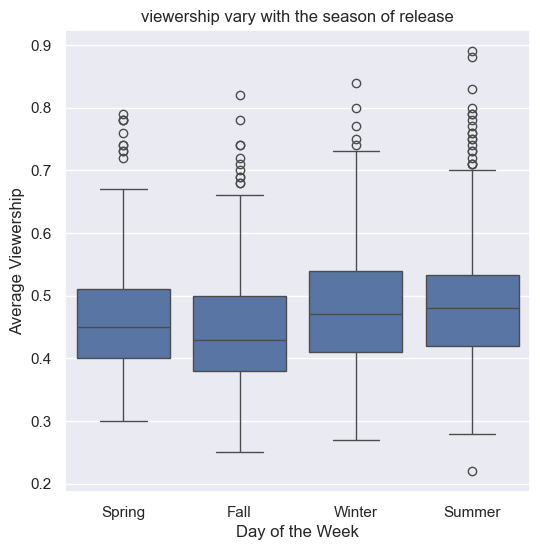

In [21]:
plt.figure(figsize=(6, 6))
sns.boxplot(data, x='season', y='views_content')
plt.title('viewership vary with the season of release')
plt.xlabel('Day of the Week')
plt.ylabel('Average Viewership')
plt.show()

* Winter seems to have the highest median viewership and many high outliers, suggesting it might be the best season for releasing content to achieve higher viewership.
* Spring and summer both have median viewership around 0.5 significant outliers, indicating potential for high viewership but also more variability.
* Fall shows a lower median viewership and fewer high outliers, it might be a less optimal season for releasing content compared to the other season.

## Data Preprocessing

### Missing value treatment

In [22]:
data.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

* It seems there is no missing values in the data.

### Outlier Detection

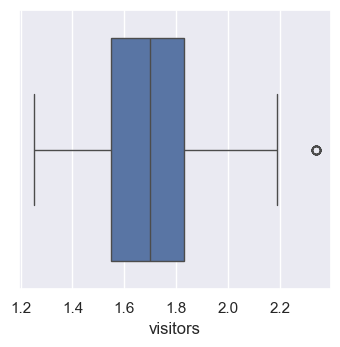

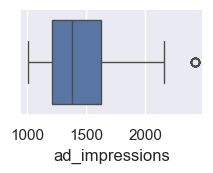

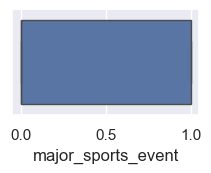

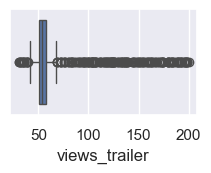

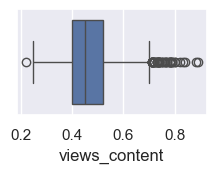

In [23]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=True)
    plt.show()

* There are few outliers in a data. However, we are not treat them.

### Data preparation for modeling

* We want to predict the viewership of the content.
* Before we proceed to build a model, we'll have to encode the categorical feature.
* We will split the data into train and test to be able to evaluate the model that we build on the train data.
* We will build a Linear Regression model using the train data and then check it's performance.

In [24]:
x = data.drop(['views_content'], axis=1)
y = data['views_content']

print(x.head())
print(y.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [25]:
# let's add the intercept of the data
x = sm.add_constant(x)

In [26]:
# creating dummy variables
x = pd.get_dummies(
    x,
    columns = x.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
x.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,1,52.69,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,1,48.74,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,1,49.81,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,0,55.83,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [27]:
# converting the input attributes into float types for modeling
x = x.astype(float)
x.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [29]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


## Model Building - Linear Regression

In [30]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.32e-215
Time:                        12:43:05   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

### Interpreting the Regression Results:

1. **Adjusted. R-squared:** It reflects the fit of the model.

   - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
   - In our case, the value for adj.R-squared is **0.729,** which is good.

      
2. ***Const* coefficient:** It is the y-intercept.

   - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., y) would be equal to the *const* coefficient.
   - In our case, the value for `const` coefficient is **0.0602.**
   

3. **Coefficient of a predictor variable:** It represents the change in the output y due to a change in the predictor variable (everything else held constant).

   - In our case, the coefficient of `visitors` is **0.1295.** 
       

### Model performance check

Let's check the performance of the model using difference matrices.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $r^2$.
* we will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [31]:
# function to compute adjusted R-squred
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    
    # predicting using the independent variables
    pred = model.predict(predictors)
    
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    
    # creating a DataFrame of matrics
    data_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )
    
    return data_perf

In [32]:
# checking model performance on train set (seen 70% data)
print("Training performance\n")
olsmodel_train_pref = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_pref

Training performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [33]:
# checking model performance on test set (seen 30% data)
print("Test Performances\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performances



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


- The training $R^2$ is 0.79, so the model is not underfitting.
- The train and test RMSE and MAE are compareble, so the model is not overfitting either.
- MAE suggests that the model can predict anime ratings within a mean error of 0.04 on the test data.
- MAPE of 9.03 on the test data means that we are able to predict within 9.03% of the viewership of the content

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variable**

3. **Independence of error terms**

4. **No Heteroscedasticity**

### Test for Multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.


* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.


* **Variance Inflation Factor (VIF):** Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_K$ is "inflated" by the existence of correlation among the predictor variables in the model.
   - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.
   
* **General Rule of thumb**:
     - If VIF is between 1 and 5, then there is low multicollinearity.
     - If VIF is between 5 and 10, we say there is moderate multicollinearity.
     - If VIF is exceeding 10, it shows signs of high multicollinearity.

let,s define a function to check VIF.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    
    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [35]:
checking_vif(x_train)

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,major_sports_event,1.065689
4,views_trailer,1.023551
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


* There is no columns with very high VIF values other than constant (intercept) indicating absence of strong multicollinearity.
* We will systematically drop numerical columns with VIF > 5.
* We will ignore the VIF values for dummy variables and the constants (intercept).
* Let's rebuild the model using the set of predictors variables.

In [36]:
olsmod1 = sm.OLS(y_train, x_train).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          1.32e-215
Time:                        12:43:05   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

### Interpreting the Regression Results:

4. **std err:** It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher the lever of accuracy.
    
    
5. **P>|t|:** It is p-value.

    * For each independent feature, there is a null hypothesis and an alternative hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.
    
  
        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)
        
    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
    
       - A p-value of less than 0.05 is considered to be statistically significant.
       
       
6. **Confidence Interval:** It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).       
    

- There is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dealing with high p-value variables       

- Some of the dummy variables in the data have p-values > 0.05. So, they are not significant and we'll drop them. 
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once instead, we will do the following:
   - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
   - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
   - Repeate the above two steps till there are no columns with p-value > 0.05.

In [37]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]
    
    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()
    
    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    
    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features = cols
print(selected_features)

['const', 'visitors', 'major_sports_event', 'views_trailer', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [38]:
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

In [39]:
olsmod1 = sm.OLS(y_train, x_train1).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          7.03e-224
Time:                        12:43:05   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [40]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod1_train_perf = model_performance_regression(olsmod1, x_train1, y_train)
olsmod1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [41]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod1_test_perf = model_performance_regression(olsmod1, x_test1, y_test)
olsmod1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train1* as the final set of predictor variables and *olsmod1* as the final model to move forward with.
* Now adjusted R-squared is 0.786, i.e., our model is able to explain ~79% of the variance.
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

**Now we will check the rest of the assumptions on *olsmod1*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Test for Linearity and Independence

* Linearity describes a straight-line relationship between two variables, predictor variables must have a liear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

To check the linearity and independence
- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

- To fix this assumption, if this is not followed, we can try to transform the variables and make the relationships linear.

In [42]:
# let us create a dataframe with actual, fitted and residual values
data_pred = pd.DataFrame()

data_pred["Actual Values"] = y_train  # actual values
data_pred["Fitted Values"] = olsmod1.fittedvalues # predicted values
data_pred["Residuals"] = olsmod1.resid  # residuals

data_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.445434,-0.045434
716,0.70,0.677403,0.022597
640,0.42,0.433999,-0.013999
804,0.55,0.562030,-0.012030
737,0.59,0.547786,0.042214


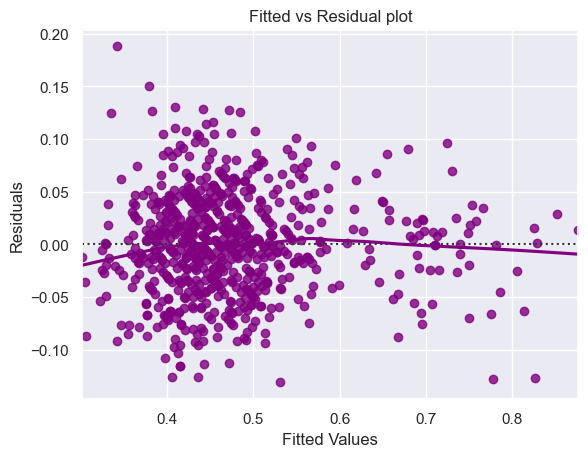

In [43]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=data_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independance are satisfied.**

### Test for Normality

* Error terms or residuals should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.
* To check normality, the shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the shapiro-wilk test.
   - Null hypothesis: Residuals are normally distributed.
   - Alternative hypothesis: Residuals are not normally distributed.
* To fix this assumption if it is not followed, we can apply transformations like log, exponential, arcsinh, etc. as per our data.

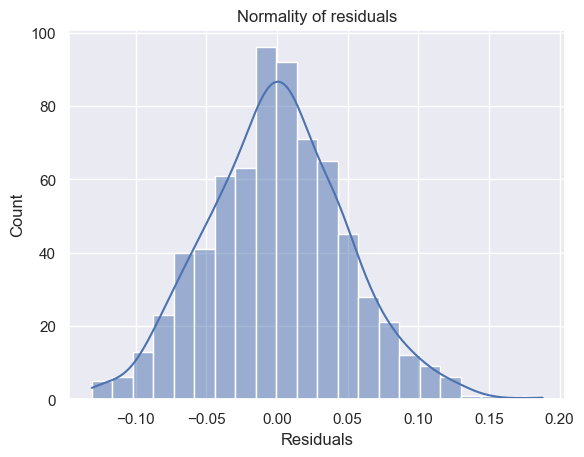

In [44]:
sns.histplot(data=data_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals have a bell shape.
* Let's check the Q-Q plot.

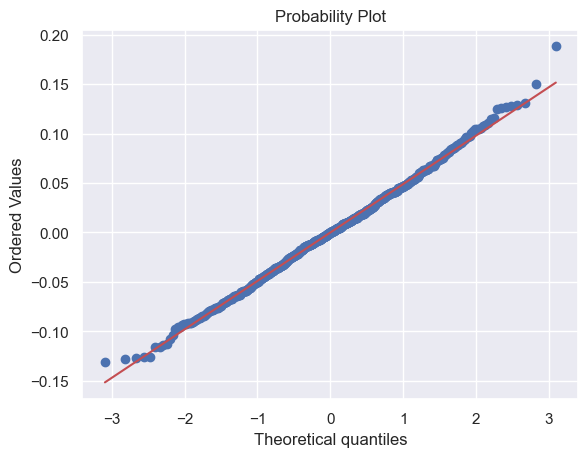

In [45]:
import pylab
import scipy.stats as stats

stats.probplot(data_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* The residuals more or less follow a straight line.
* Let's check the results of the Shapiro-Wilk test.

In [46]:
stats.shapiro(data_pred["Residuals"])

ShapiroResult(statistic=0.9973143339157104, pvalue=0.3104695975780487)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
* **So, the assumption is satisfied.**

### Test for Homoscedasticity

* **Homoscedasticity:** If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.
* **Heteroscedasticity:** If the variance is unequal for the residuals across the regression lie, then the data is said to be heteroscedastic.

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance aries in presence of outliers.

* To check for homoscedasticity, the residual vs values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic otherwise they are heteroscedastic.
   - Null hypothesis: Residuals are homoscedasticity.
   - Alternative hypothesis: Residuals have heteroscedasticity.
   
* To fix assumption if it is not followed, heteroscedasticity can be fixed by adding other important features or making transformations.

In [47]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(data_pred["Residuals"], x_train1)
lzip(name, test)

[('F statistic', 1.1313612904200752), ('p-value', 0.12853551819087372)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

### Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [48]:
# Predictions on the test set
pred = olsmod1.predict(x_test1)

data_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
data_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


* We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

## Final Model

In [55]:
x_train_final = x_train1.copy()
x_test_final = x_test1.copy()

In [56]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Mon, 29 Jul 2024   Prob (F-statistic):          7.03e-224
Time:                        12:50:31   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

In [57]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [58]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


* The model is able to explain ~75% of the variation of the data.
* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.
* The MAPE on the test set suggests we can predict within 9.2% of the viewers of content of the data.
* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purpose.

## Conclusions and Recommendations

* The model is able to explain ~75% of the variation in the data and within 9.2% of the viewership of content on the test data, which is good. This indicates that the model is good and for prediction as well as inference purpose.
* If the visitors of an OTT platform increases by one unit then its viewers of content increases by 0.123 units. All other variables held constant.
* If the major of events on OTT platform increases by one unit then its rating decreases by 0.061 units. All other variables held constant.
* If the viewers of the trailer on OTT platform increases by on unit then its viewers of content increases by 0.0023 units. All other variables held constant.
* As the viewers of content on OTT platform increase with the increasing of the visitors to the OTT platform, the company need to improve its marketing activities to increase their viewers.
* As the viewers of the content increases with increase in its content, the company can look to add more content which is attracted by viewers to their portal.
* Company need to gather data about their users like age, gender, geographical location, occupation etc, to better understand the kind of genre and shows different users like.
